In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset creation (replace this with loading your actual dataset)

In [5]:

data = pd.read_csv("weather_data_sample.csv")
df = pd.DataFrame(data)


In [6]:
df.info

<bound method DataFrame.info of            Date  Temperature   Humidity  WindSpeed     Pressure        Weather
0    2022-07-01    34.585354  49.893969  15.054629  1012.724075         Cloudy
1    2022-07-02    29.441570  41.652027   7.355783  1004.270832          Sunny
2    2022-07-03    27.380405  79.819598   7.979895  1011.860178           Rain
3    2022-07-04    34.098615  55.814886  23.968225  1009.557672           Snow
4    2022-07-05    31.928339  67.505245  18.240743  1003.305428         Cloudy
..          ...          ...        ...        ...          ...            ...
743  2024-07-13    29.821735  81.467551   9.494870  1018.866836          Sunny
744  2024-07-14    24.566630  83.040096  11.989399  1019.826732           Rain
745  2024-07-15    20.710904  63.642742  16.182015  1003.799154          Sunny
746  2024-07-16    24.872425  52.428808   8.290008  1009.880375  Partly Cloudy
747  2024-07-17    34.806292  81.969276  12.984067  1015.126608         Cloudy

[748 rows x 6 colum

# Check for missing values

In [7]:

print(df.isnull().sum())

Date           0
Temperature    0
Humidity       0
WindSpeed      0
Pressure       0
Weather        0
dtype: int64


# Split the data into features and target

In [8]:
X = df[['Temperature', 'Humidity', 'WindSpeed', 'Pressure']]
y = df['Weather']

# Split the data into training and testing sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Assuming y_train and X_train are already defined
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)

# Initialize the model
model = DecisionTreeClassifier()

# Train the model with the encoded target variable
model.fit(X_train, y_train_encoded)

DecisionTreeClassifier()

In [11]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate mean squared error and r2 score

In [12]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Sample data for demonstration
y_test = np.array([3, 5, np.nan, 8, 'invalid', 10])
y_pred = np.array([2.5, 5.1, 7.8, np.nan, 8.5, 'invalid'])

# Convert to numeric and handle invalid parsing (NaNs)
y_test = pd.to_numeric(y_test, errors='coerce')
y_pred = pd.to_numeric(y_pred, errors='coerce')

# Drop NaN values that result from conversion
valid_indices = ~np.isnan(y_test) & ~np.isnan(y_pred)
y_test = y_test[valid_indices]
y_pred = y_pred[valid_indices]

# Debug prints
print(f"Length of y_test after filtering: {len(y_test)}")
print(f"Length of y_pred after filtering: {len(y_pred)}")

# Check if arrays are empty
if len(y_test) == 0 or len(y_pred) == 0:
    print("Error: One or both arrays are empty after filtering out NaN values.")
else:
    # Calculate Mean Squared Error and R^2 Score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

Length of y_test after filtering: 2
Length of y_pred after filtering: 2
Mean Squared Error: 0.12999999999999998
R^2 Score: 0.87


# Plot the Pressure vs Temperature values

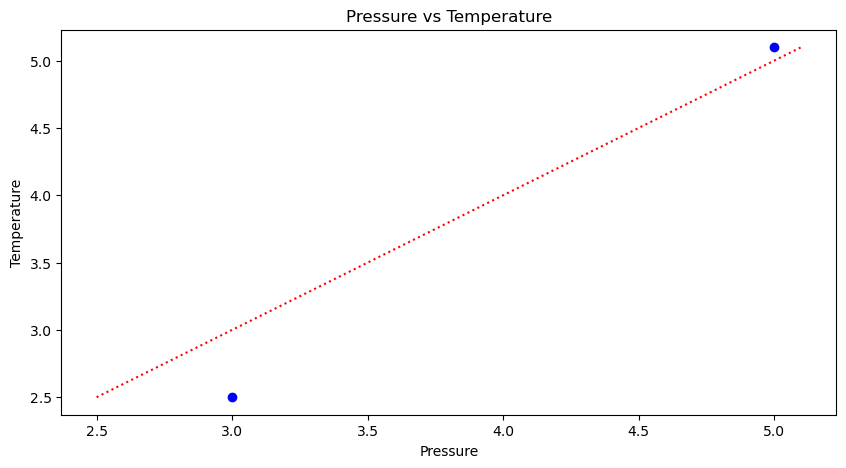

In [13]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined and filtered
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue')

# Adding a red dotted line from min to max of y_test
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='dotted')

plt.xlabel('Pressure')
plt.ylabel('Temperature')
plt.title('Pressure vs Temperature')
plt.show()

C:\Users\tamil\AppData\Local\Temp\ipykernel_14932\3216002298.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


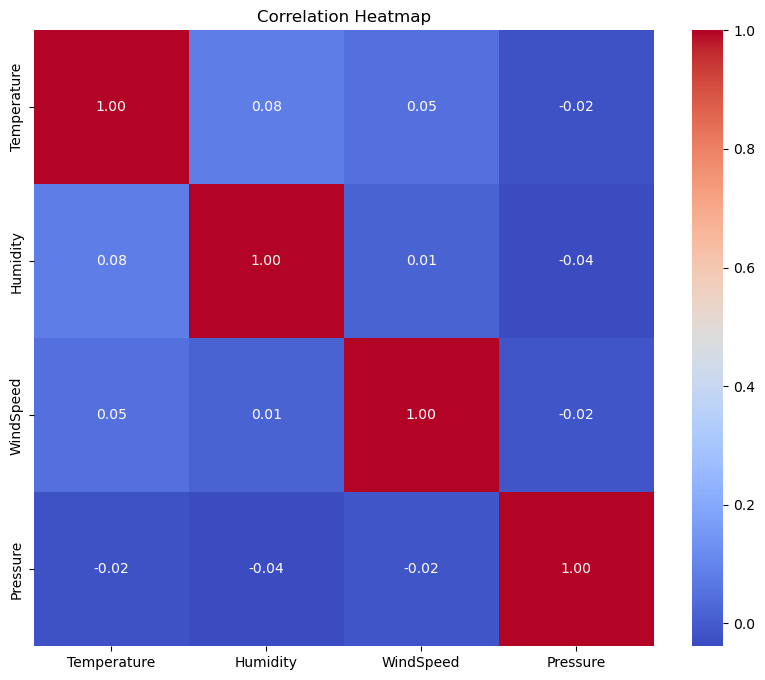

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


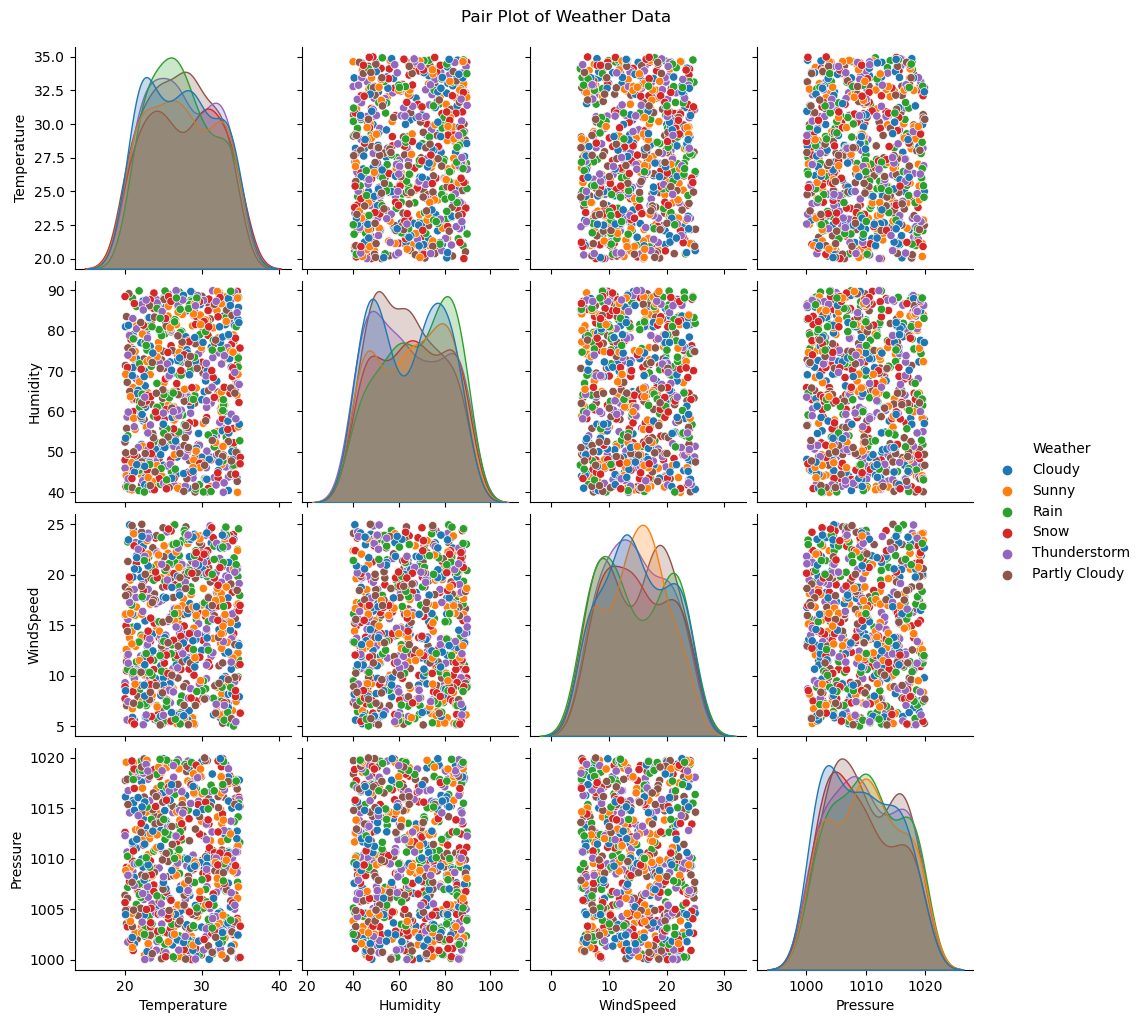

In [15]:
sns.pairplot(df, hue='Weather')
plt.suptitle('Pair Plot of Weather Data', y=1.02)
plt.show()

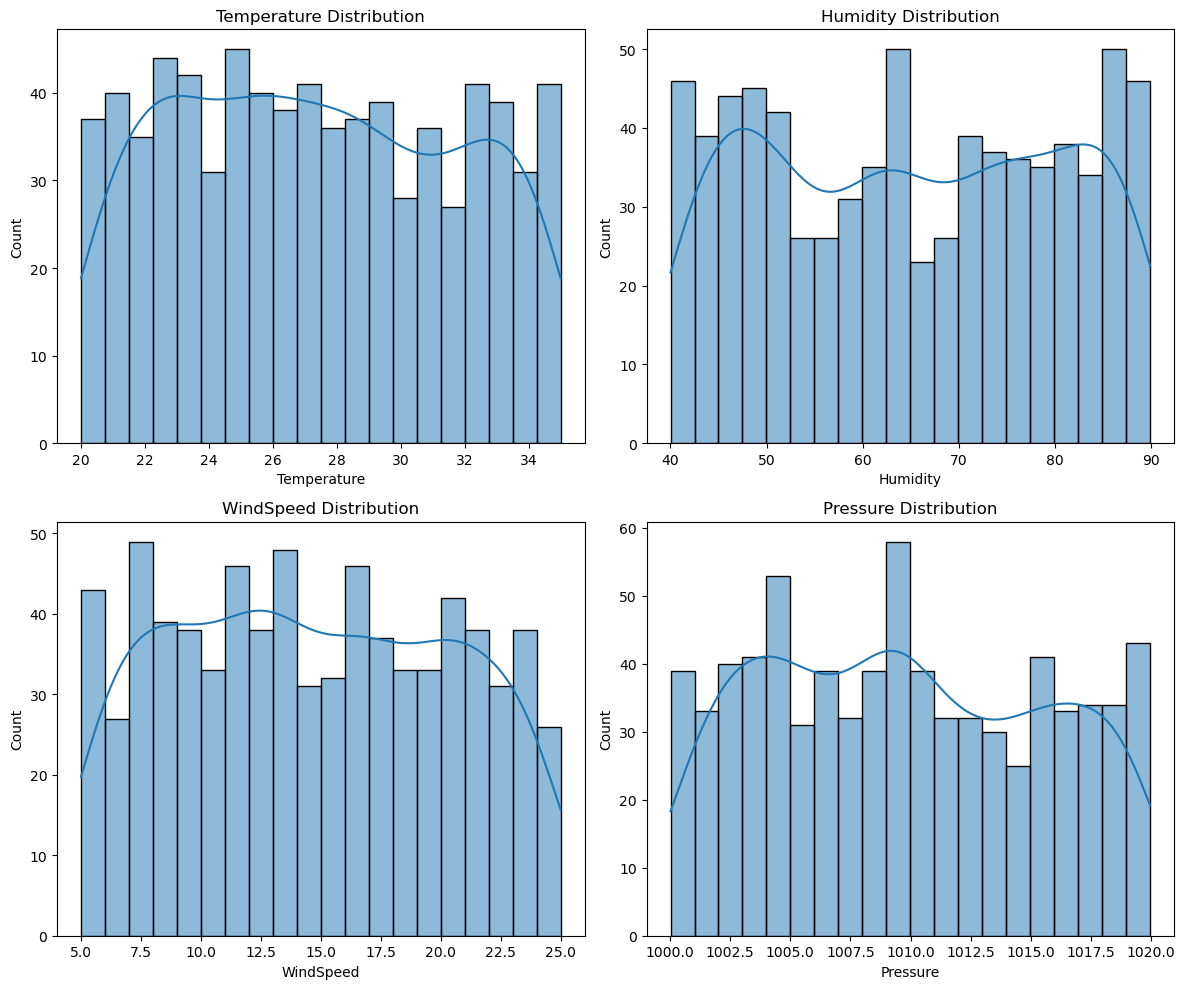

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df['Temperature'], bins=20, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Temperature Distribution')

sns.histplot(df['Humidity'], bins=20, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Humidity Distribution')

sns.histplot(df['WindSpeed'], bins=20, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('WindSpeed Distribution')

sns.histplot(df['Pressure'], bins=20, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Pressure Distribution')

plt.tight_layout()
plt.show()